In [1]:
import pandas as pd
import numpy as np

## Partie1 : Visualisation de la fonction exponentielle

### 1.	Définir dans python la fonction f (a) = exp(-a) x cos(2π x a)  [x est le signe de la multiplication]

In [2]:
from math import exp, expm1
import math

In [3]:
def f(a):
     return exp(-a) * np.cos(2 * np.pi * a)

In [4]:
f(2)

0.1353352832366127

In [ ]:
f(4)

0.01831563888873418

### 2.	Tracer la fonction y = f(a) dans l’intervalle [0, 5].

In [ ]:
from pylab import *

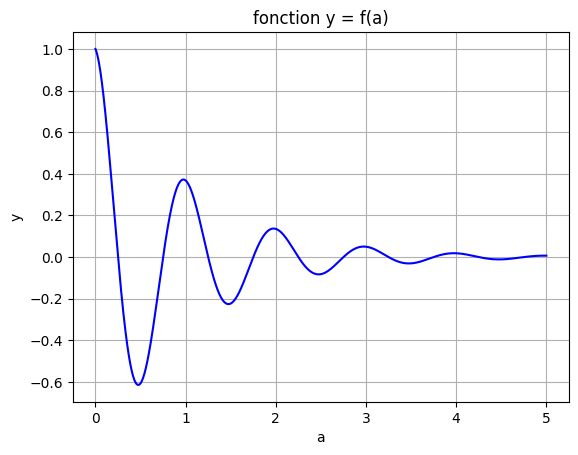

In [ ]:
a= linspace(0,5, 10000)

plt.plot(a, f(a), 'b')
plt.title("fonction y = f(a)")
plt.xlabel("a")
plt.ylabel("y")
grid()

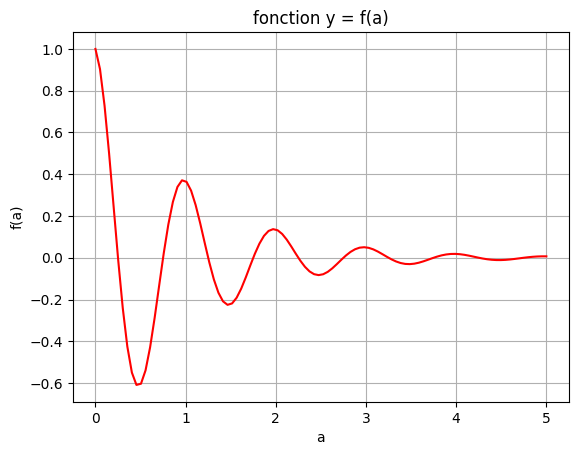

In [ ]:
a= linspace(0,5, 100)
y= exp(-a) * np.cos(2 * np.pi * a)

plt.plot(a, y, 'r')
plt.title("fonction y = f(a)")
plt.xlabel("a")
plt.ylabel("f(a)")
grid()

### 3.	L’équation f(a) = 0 a-t-elle des solutions entières dans l’intervalle [0,100]

In [ ]:
def f(a):
    y = exp(-a) * cos(2*pi * a)
    return y
for i in arange(0,101,1):
    y = f(i)
    if y==0:
        print(i)

# Réponses:pas de solution entière

## Partie 2 : Visualisation des données d’un dataset

### 4.	Importer dataset à l’aide du package pandas et afficher les 5 dernières lignes de dataset.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/pefura/IFPERA/main/Cameroon_lung_function.csv", sep=';')
dataset.tail(5)

,ID,sex,age,ethnicity,height,fvc,fev,fef2575,fevfvc
1772,1752,2,80.260096,1,163,1.92,1.54,3.46,0.85
1773,1525,2,80.996578,1,160,1.40,1.01,2.41,0.72
1774,1995,2,81.160849,1,160,1.70,1.26,2.96,0.74
1775,1722,2,85.232033,1,170,2.31,2.04,4.35,0.88
1776,1469,2,88.131417,1,160,2.27,1.65,3.92,0.73


### 5.	Rendre conforme la typologie des variables de dataset.

In [ ]:
dataset.shape

(1777, 9)

In [ ]:
## Tyopologie donnée par python
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1777 non-null   int64  
 1   sex        1777 non-null   int64  
 2   age        1777 non-null   float64
 3   ethnicity  1777 non-null   int64  
 4   height     1777 non-null   int64  
 5   fvc        1777 non-null   float64
 6   fev        1777 non-null   float64
 7   fef2575    1777 non-null   float64
 8   fevfvc     1777 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 125.1 KB


In [ ]:
# Rendre conforme la trypologie des deux variables categorielles
# la fonction info(), permet egalement de verifier les valeurs manquantes, le nombre de colonnes et de lignes

dataset[['sex','ethnicity']] = dataset[['sex','ethnicity']].astype('object')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1777 non-null   int64  
 1   sex        1777 non-null   object 
 2   age        1777 non-null   float64
 3   ethnicity  1777 non-null   object 
 4   height     1777 non-null   int64  
 5   fvc        1777 non-null   float64
 6   fev        1777 non-null   float64
 7   fef2575    1777 non-null   float64
 8   fevfvc     1777 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 125.1+ KB


### 6.	En utilisant la programmation orientée objet de matplotlib, représenter le nuage de points décrivant fev en fonction de l’âge.

In [ ]:
import matplotlib.pyplot as plt

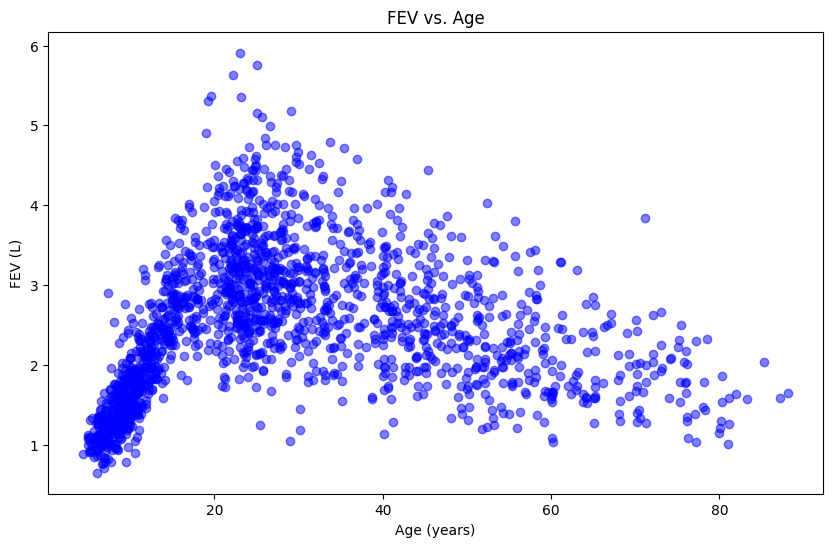

In [ ]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot
ax.scatter(dataset['age'], dataset['fev'], c='b', alpha=0.5)

# Set labels and title
ax.set_xlabel('Age (years)')
ax.set_ylabel('FEV (L)')
ax.set_title('FEV vs. Age')

# Show plot
plt.show()

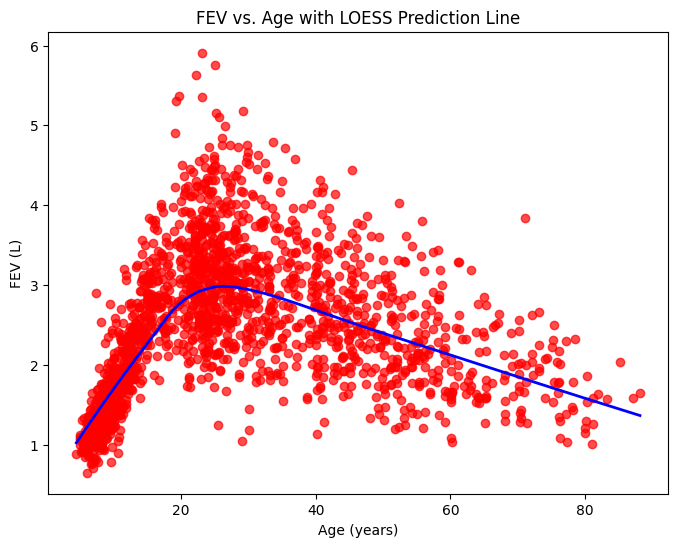

In [ ]:
import statsmodels.api as sm
# Fit LOESS regression
lowess = sm.nonparametric.lowess(dataset['fev'], dataset['age'])

# Extracting the coordinates of the lowess line
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create scatter plot
ax.scatter(dataset['age'], dataset['fev'], c='red', alpha=0.7)

# Plot the LOESS line
ax.plot(lowess_x, lowess_y, 'blue', linewidth=2)

# Set labels and title
ax.set_xlabel('Age (years)')
ax.set_ylabel('FEV (L)')
ax.set_title('FEV vs. Age with LOESS Prediction Line')

# Show plot
plt.show()

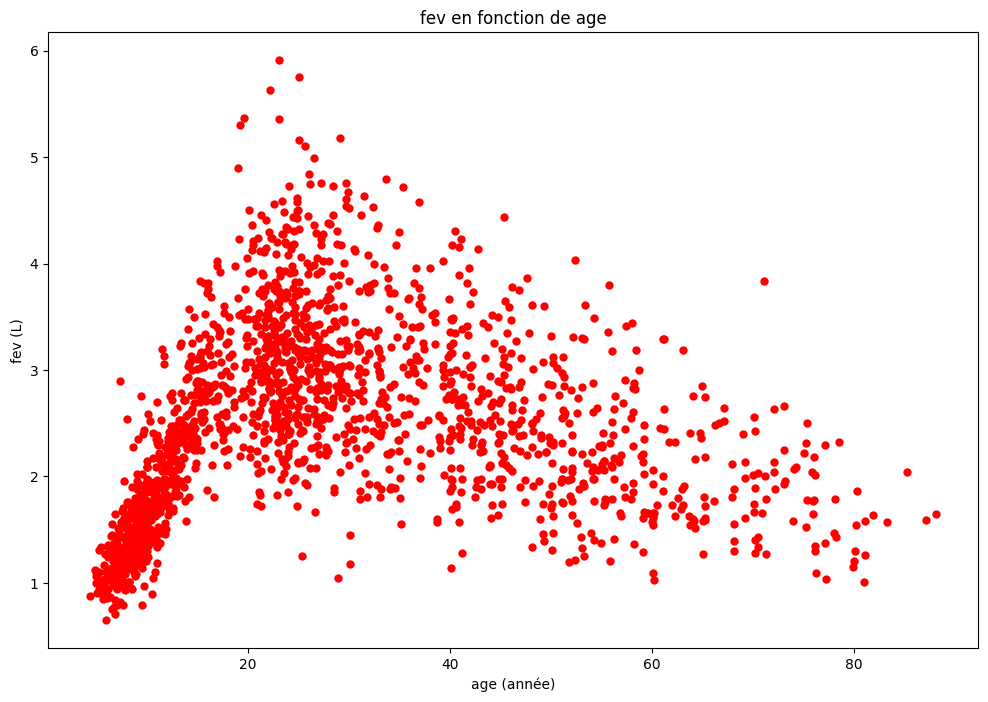

In [ ]:
plt.figure(figsize=(12, 8)) #pour augmenter la taille de la figure
plt.scatter(dataset.age, dataset.fev, lw = 0.001, c="red") #lw(linewidth) pour augmenter des points(nuage), c pour color
plt.xlabel('age (année)')
plt.ylabel('fev (L)')
plt.title('fev en fonction de age')
plt.show()

### 7.	Représenter graphiquement la variable « ethnicity ».

In [ ]:
dataset["sex"].value_counts()

sex
2    935
1    842
Name: count, dtype: int64

In [ ]:
# Renommer les modalités
dataset['sex'] = dataset['sex'].astype("category")
dataset['ethnicity'] = dataset['ethnicity'].astype("category")

dataset['sex'] = dataset['sex'].replace({'1': 'Male', '2': 'Female'})
dataset["ethnicity"] = dataset["ethnicity"].replace({'1': 'bantu', 'soudano-sahelian': 'mixed'})

dataset.dtypes

ID              int64
sex          category
age           float64
ethnicity    category
height          int64
fvc           float64
fev           float64
fef2575       float64
fevfvc        float64
dtype: object

In [ ]:
dataset.head(4)

,ID,sex,age,ethnicity,height,fvc,fev,fef2575,fevfvc
0,1000948,1,4.95,1,109,1.230,1.12,1.39,0.91
1,500921,1,5.00,1,119,1.100,1.10,1.81,1.00
2,1000157,1,5.40,1,107,0.970,0.91,1.70,0.94
3,1000805,1,5.29,1,118,0.939,0.94,1.64,1.00


In [ ]:
dataset["ethnicity"].value_counts()

ethnicity
1    1477
2     217
3      83
Name: count, dtype: int64

Text(0, 0.5, 'count')

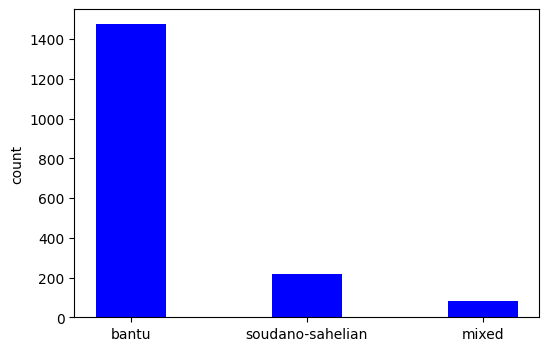

In [ ]:
# Bar chart
names = ["bantu", "soudano-sahelian", "mixed"]
values= [1477, 217,  83]

plt.figure(figsize = (6, 4))
plt.bar(names, values,color="blue",  width=0.4)
plt.ylabel("count")

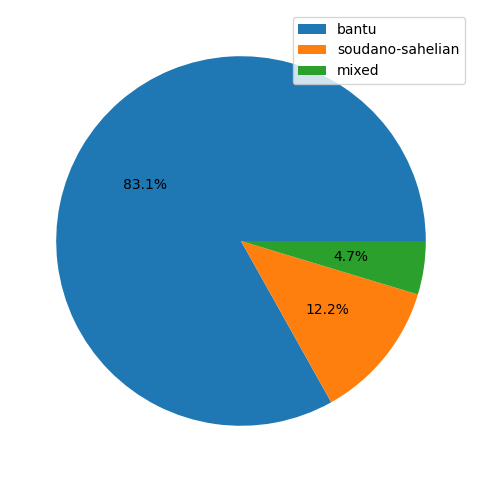

In [ ]:
# Pie chart
names = ["bantu", "soudano-sahelian", "mixed"]
values= [1477, 217,  83]

fig, ax = plt.subplots(figsize = (10, 6))
ax.pie(values, autopct='%1.1f%%')# labels=names
ax.legend(names, loc=1)

([<matplotlib.patches.Wedge at 0x7beae2da4a60>,
 [Text(-0.9488787721615468, 0.5564432367647175, 'bantu'),
  Text(0.8573233039984107, -0.6892000815592296, 'soudano-sahelian'),
  Text(1.0881787460253074, -0.1608322626178899, 'mixed')],
 [Text(-0.5175702393608437, 0.303514492780755, '83.1%'),
  Text(0.46763089309004213, -0.37592731721412526, '12.2%'),
  Text(0.5935520432865312, -0.08772668870066722, '4.7%')])

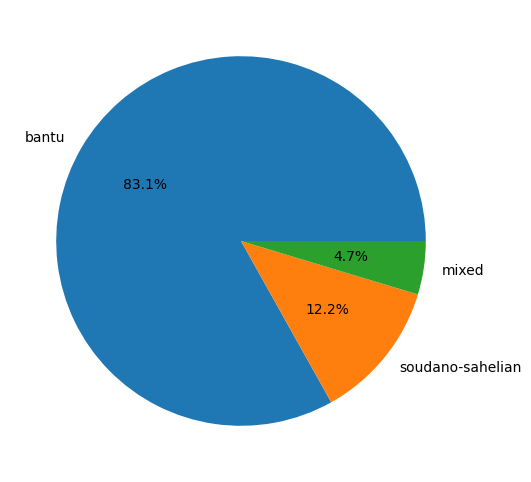

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.pie(values,labels=names,autopct='%1.1f%%')# labels=names

### 8.	Tracer à l’aide du package « seaborn » l’histogramme d’âge des sujets de sexe masculin, la largeur des classes étant de 3 et indiquant la courbe de densité sur la même figure.

In [ ]:
import seaborn as sns

<Axes: xlabel='age', ylabel='Count'>

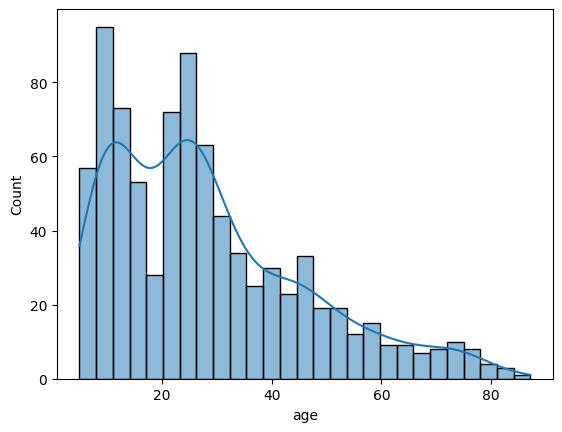

In [ ]:
sns.histplot(data=dataset[dataset['sex']==1], x="age",binwidth=3, kde=True)

### 9.	Faire deux figures superposées montrant pour l’une la relation entre le fvc et l’âge chez les sujets de sexe masculin et pour l’autre la relation entre le fvc et l’âge chez les sujets de sexe féminin.

In [ ]:
dataset_female = dataset[dataset["sex"] == 2]
dataset_male = dataset[dataset["sex"] == 1]
dataset_female

,ID,sex,age,ethnicity,height,fvc,fev,fef2575,fevfvc
842,1000964,2,4.450000,1,119,0.920,0.88,1.61,0.96
843,500727,2,5.020000,1,109,1.100,1.00,1.26,0.91
844,500807,2,5.000000,1,123,1.090,1.07,1.83,0.98
845,1000002,2,5.240000,1,122,1.090,1.04,1.23,0.95
846,1000495,2,5.070000,1,117,0.939,0.91,1.84,0.97
...,...,...,...,...,...,...,...,...,...
1772,1752,2,80.260096,1,163,1.920,1.54,3.46,0.85
1773,1525,2,80.996578,1,160,1.400,1.01,2.41,0.72
1774,1995,2,81.160849,1,160,1.700,1.26,2.96,0.74
1775,1722,2,85.232033,1,170,2.310,2.04,4.35,0.88


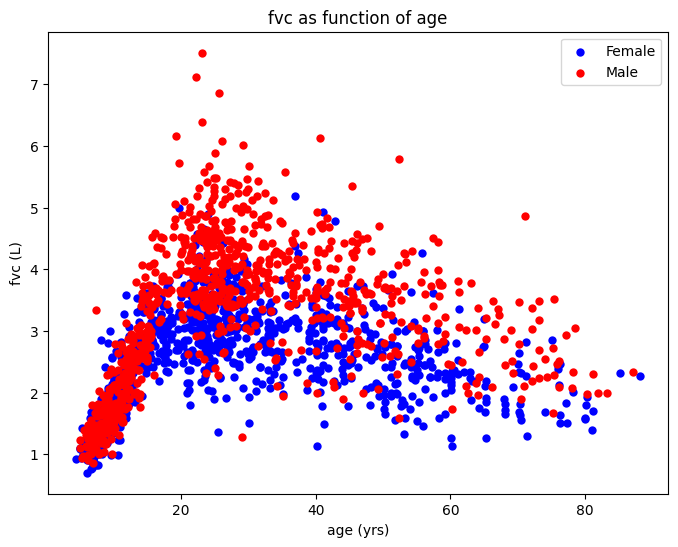

In [ ]:
# Avec matplotlib

plt.figure(figsize=(8, 6)) #pour augmenter la taille de la figure
plt.scatter(dataset_female.age, dataset_female.fvc, lw = 0.001, c = 'b', label = 'Female')
plt.scatter(dataset_male.age, dataset_male.fvc, lw = 0.001, c = 'r', label = 'Male')#lw pour augmenter des points, c pour color
plt.xlabel('age (yrs)')
plt.ylabel('fvc (L)')
plt.title('fvc as function of age')
plt.legend()
plt.show()

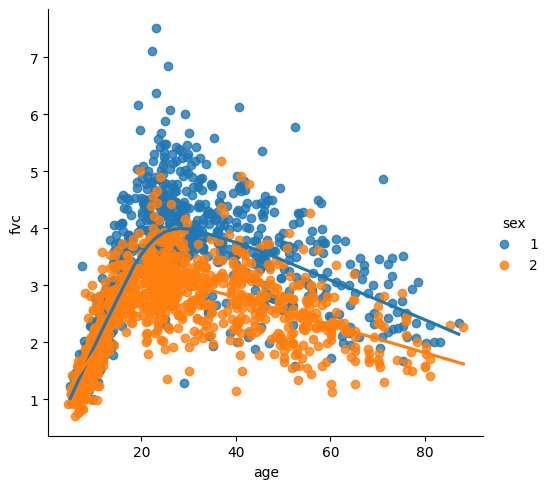

In [ ]:
# avec seaborn

sns.lmplot(data=dataset, x="age", y="fvc", hue = 'sex', lowess = True)

### 10.	Ecrire une fonction permettant de réaliser une figure permettant de faire l’histogramme de toutes les données quantitatives.

In [ ]:
def multi_hist(data, bins):
    df = dataset.drop(columns = ["ID"])
    df = df.select_dtypes(exclude=['category'])
    fig = plt.figure (figsize= (15,10))
    ax = fig.gca()
    hist = df.hist(ax = ax, bins=bins, grid= False, edgecolor = "black", color = "darkblue")
    return multi_hist

<ipython-input-90-7f1e33aef207>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist = df.hist(ax = ax, bins=bins, grid= False, edgecolor = "black", color = "darkblue")


<function __main__.multi_hist(data, bins)>

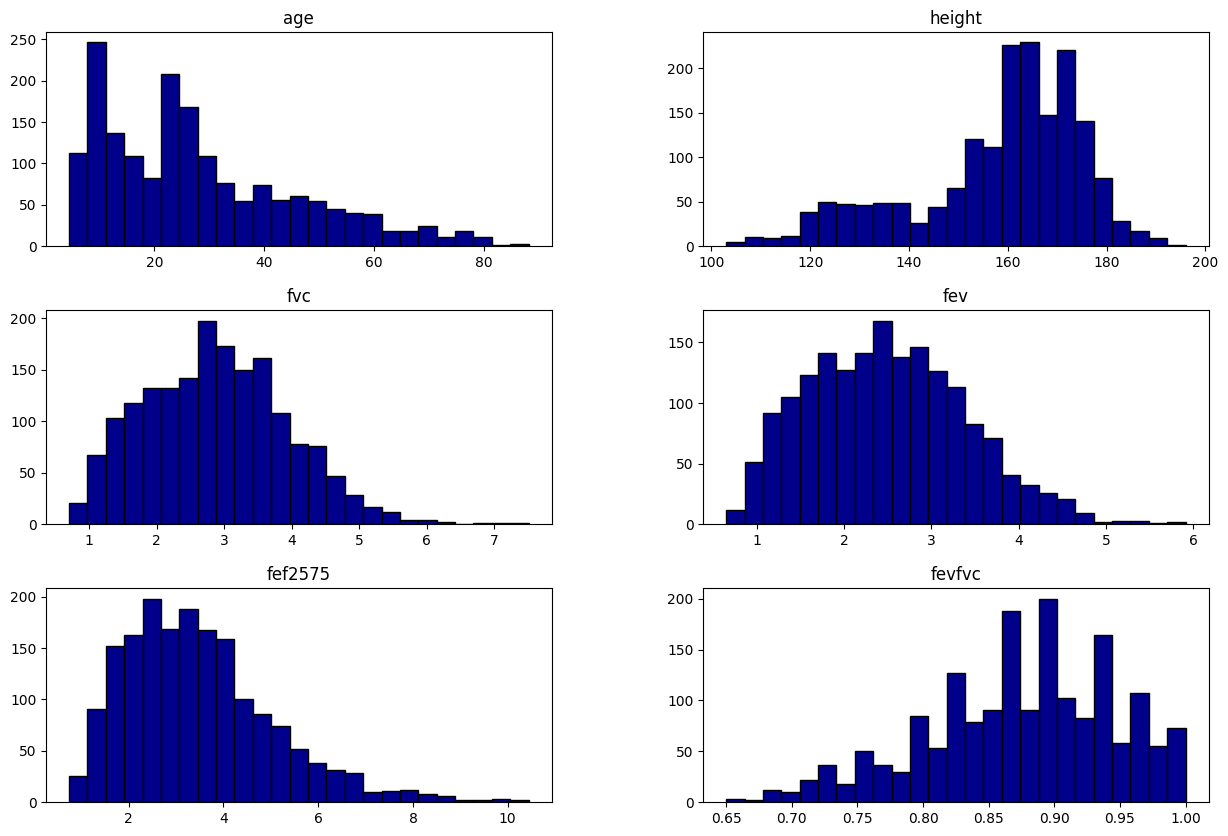

In [ ]:
multi_hist(data=dataset, bins=25)